In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

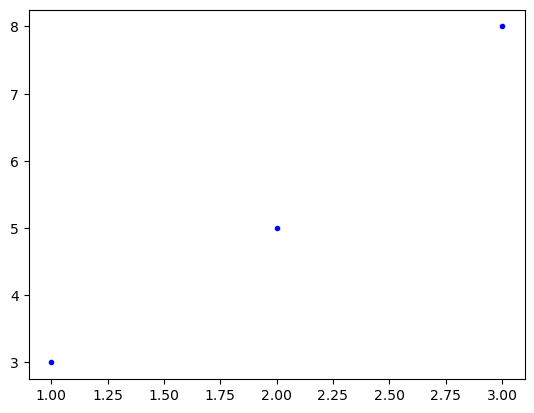

In [2]:
x = np.array([1, 2, 3]) #  y = 2x + 1
y = np.array([3, 5, 8])
plt.plot(x, y, "b.");

In [3]:
X = np.c_[np.ones((3, 1)), x] # add x0 = 1 to each instance
X

array([[1., 1.],
       [1., 2.],
       [1., 3.]])

In [4]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([0.33333333, 2.5       ])

In [5]:
xtest = np.array([[0], [2], [4]])
xtest

array([[0],
       [2],
       [4]])

In [6]:
xtestb = np.c_[np.ones((3, 1)), xtest]  # add x0 = 1 to each instance
xtestb

array([[1., 0.],
       [1., 2.],
       [1., 4.]])

In [7]:
ypred = xtestb.dot(theta)
ypred

array([ 0.33333333,  5.33333333, 10.33333333])

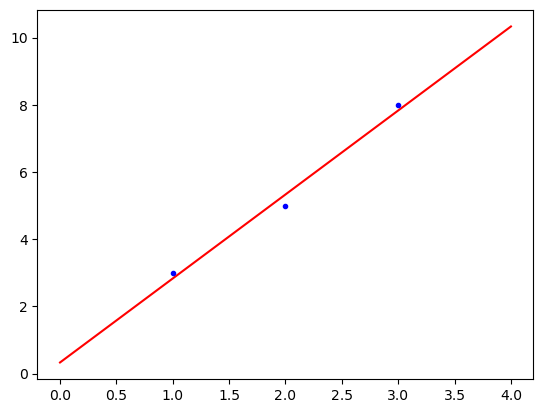

In [8]:
plt.plot(xtest, ypred, "r-")
plt.plot(x, y, "b.");

### sklearn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
x = np.array([1, 2, 3]).reshape(-1,1)
x

array([[1],
       [2],
       [3]])

In [11]:
y = np.array([3, 5, 7]).reshape(-1,1)
y

array([[3],
       [5],
       [7]])

In [12]:
model = LinearRegression()

In [13]:
model.fit(x, y)

LinearRegression()

In [14]:
model.intercept_   # y = ax + b

array([1.])

In [15]:
model.coef_

array([[2.]])

In [16]:
xtest = np.array([[0], [2], [4]]).reshape(-1,1)
xtest

array([[0],
       [2],
       [4]])

In [17]:
ypred = model.predict(xtest)
ypred

array([[1.],
       [5.],
       [9.]])

### Example 2

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
X = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y = np.array([18, 41, 61, 79, 70, 120, 141, 150, 120, 200])

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

df = pd.DataFrame(X)
df

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [20]:
df['y'] = y
df

,0,y
0,10,18
1,20,41
2,30,61
3,40,79
4,50,70
5,60,120
6,70,141
7,80,150
8,90,120
9,100,200


In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
xtrain

array([[ 10],
       [ 80],
       [ 30],
       [100],
       [ 50],
       [ 40],
       [ 70]])

In [23]:
xtest

array([[90],
       [20],
       [60]])

In [24]:
ytrain

array([[ 18],
       [150],
       [ 61],
       [200],
       [ 70],
       [ 79],
       [141]])

In [25]:
ytest

array([[120],
       [ 41],
       [120]])

Text(0, 0.5, 'y')

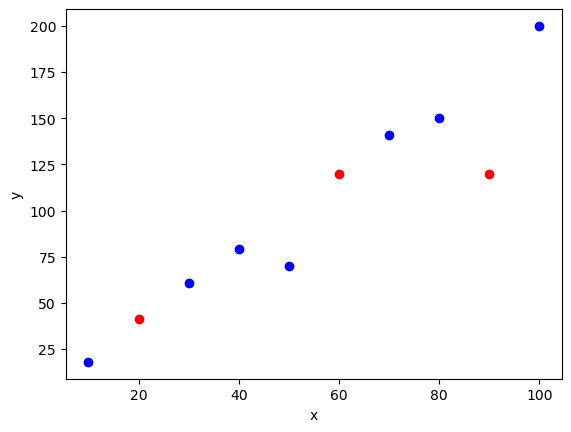

In [26]:
plt.scatter(xtrain, ytrain, color='b')
plt.scatter(xtest, ytest, color='r')
plt.xlabel('x')
plt.ylabel('y')

In [27]:
# create model
model = LinearRegression()

In [28]:
# train model
model.fit(xtrain, ytrain)

LinearRegression()

In [29]:
# predict model
ypred = model.predict(xtest)
ypred

array([[173.93069307],
       [ 34.34653465],
       [114.10891089]])

In [30]:
model.coef_

array([[1.99405941]])

In [31]:
model.intercept_

array([-5.53465347])

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(ytest, ypred)

995.8310623141523

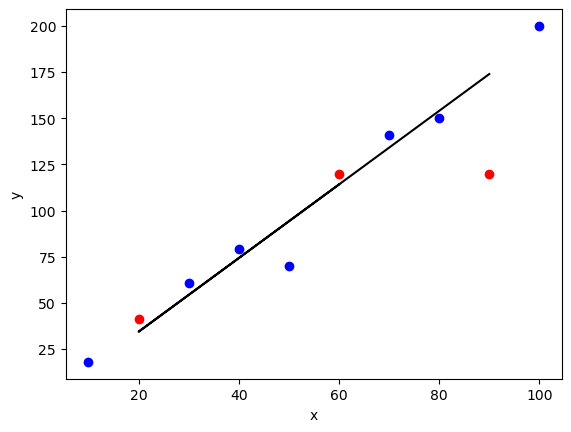

In [35]:
plt.scatter(xtrain, ytrain, color='b')
plt.scatter(xtest, ytest, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtest, ypred, color='black')